## **Problem Statement**


Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

## **Evaluation**
The evaluation metric for this challenge is `Mean Absolute error`, where 1 indicates that the individual does have a bank account and 0 indicates that they do not.

## **DATA**

- **Train.csv:** contains the data to be used

- **VariableDefinition.csv**:Full list of variables and their explanations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, r2_score, mean_absolute_error

In [149]:
train_data = pd.read_csv("./Train.csv")
test_data = pd.read_csv("./Test.csv")
test_X = pd.read_csv("./Test.csv")
variables_def = pd.read_csv("./VariableDefinitions.csv")

In [4]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
test_data.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [6]:
variables_def

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


Categorical colums

country

uniqueid

bank_account

location_type

cellphone_access

relationship_with_head

marital_status

education_level

job_type

In [8]:
test_data.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
test_data.describe()

,year,household_size,age_of_respondent
count,10086.000000,10086.000000,10086.000000
mean,2016.975907,3.778802,38.308348
std,0.847356,2.212721,16.270053
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,48.000000
max,2018.000000,20.000000,100.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_11960\3874388404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age_of_respondent'])


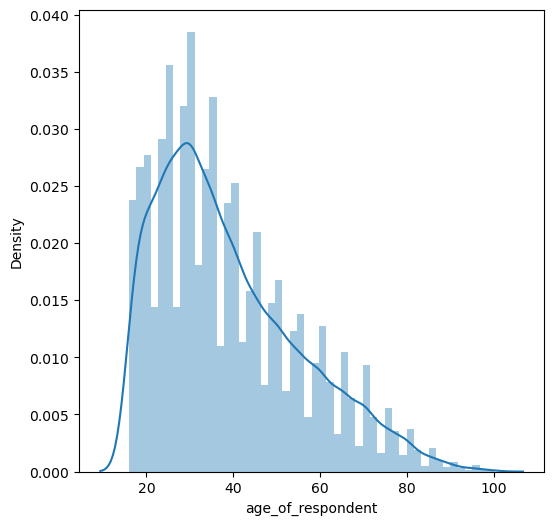

In [37]:
# Age_of_respondents distribution
plt.figure(figsize=(6,6))
sns.distplot(data['age_of_respondent'])
plt.show()

<Axes: >

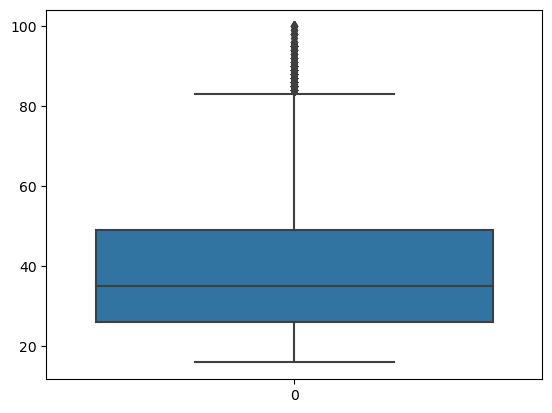

In [38]:
sns.boxplot(data["age_of_respondent"])

C:\Users\USER\AppData\Local\Temp\ipykernel_11960\3967606307.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['household_size'])


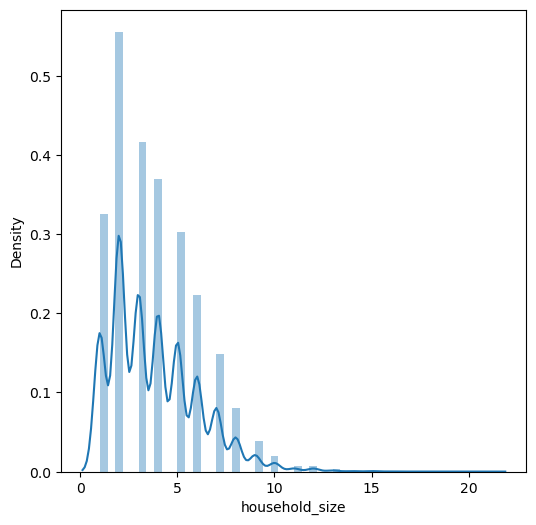

In [42]:
plt.figure(figsize=(6,6))
sns.distplot(data['household_size'])
plt.show()

<Axes: >

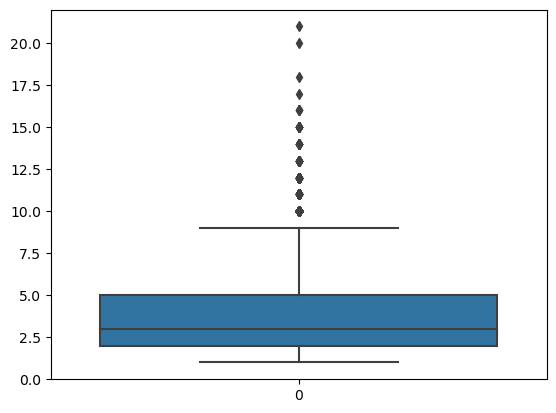

In [43]:
sns.boxplot(data["household_size"])

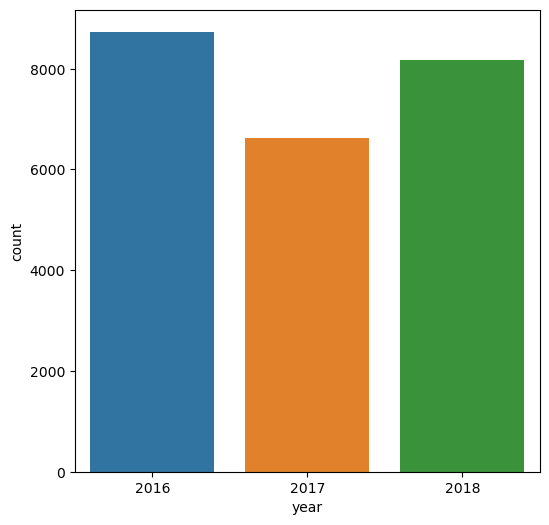

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x="year", data=data)
plt.show()

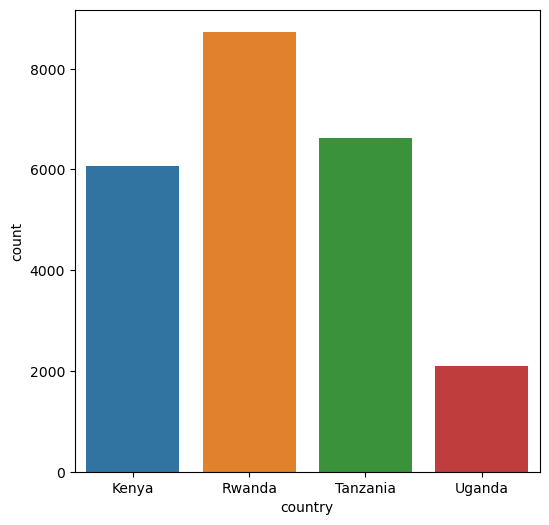

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x="country", data=data)
plt.show()

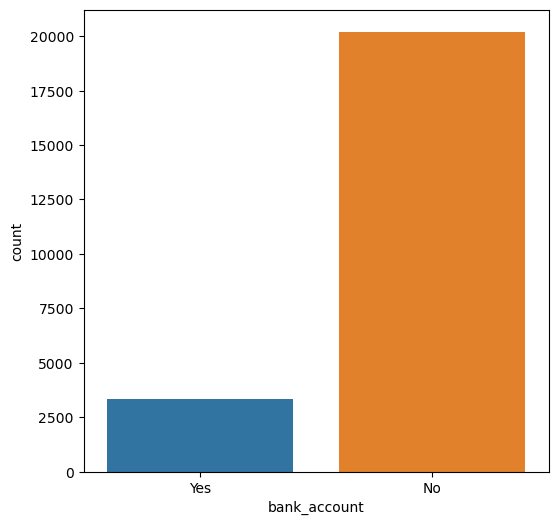

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x="bank_account", data=data)
plt.show()

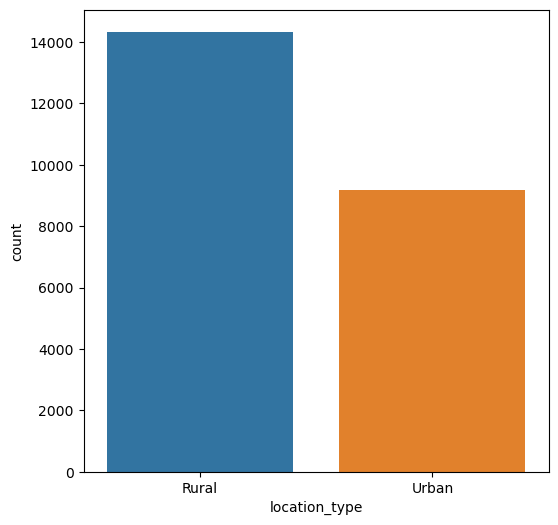

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x="location_type", data=data)
plt.show()

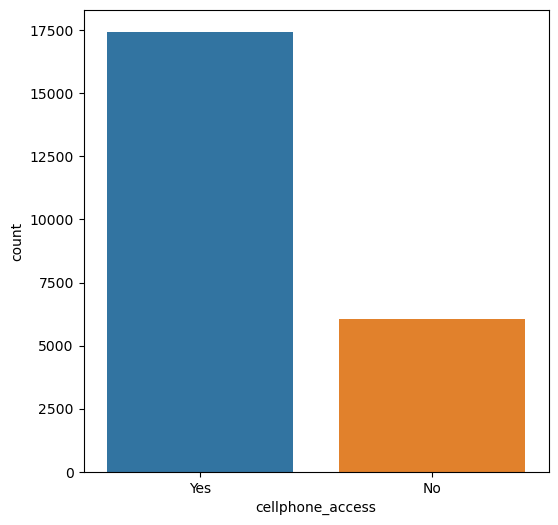

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x="cellphone_access", data=data)
plt.show()

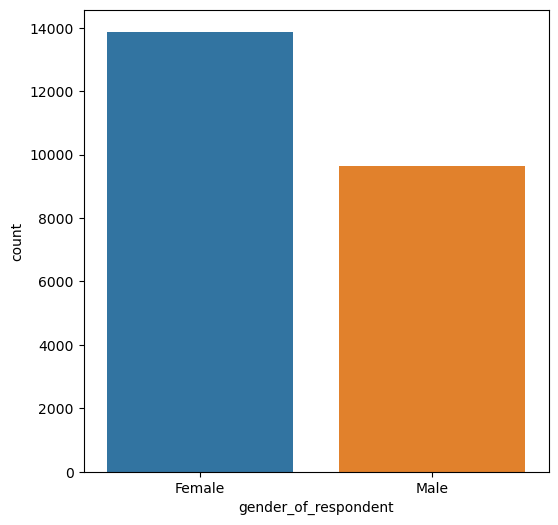

In [49]:
plt.figure(figsize=(6,6))
sns.countplot(x="gender_of_respondent", data=data)
plt.show()

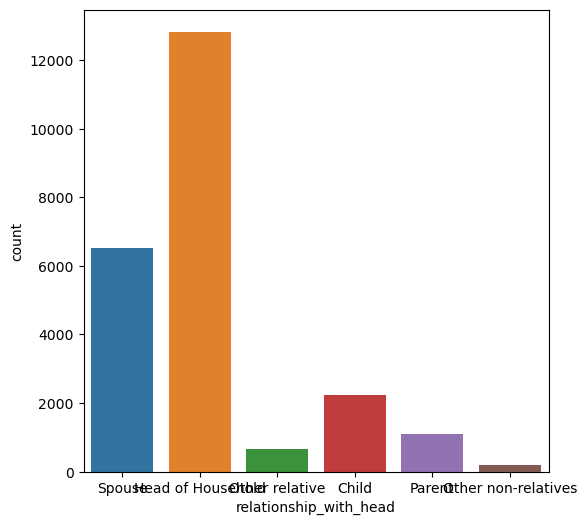

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x="relationship_with_head", data=data)
plt.show()

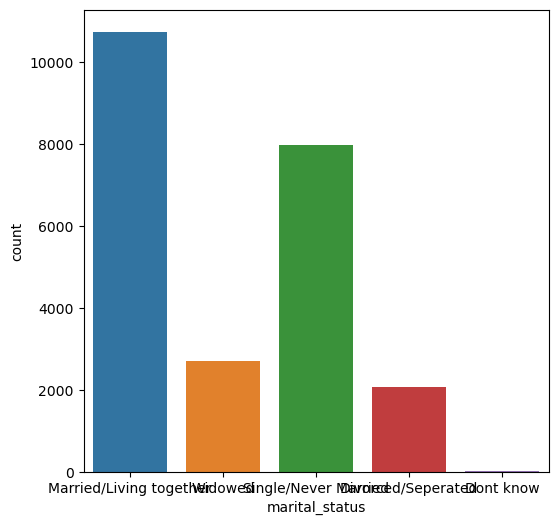

In [51]:
plt.figure(figsize=(6,6))
sns.countplot(x="marital_status", data=data)
plt.show()

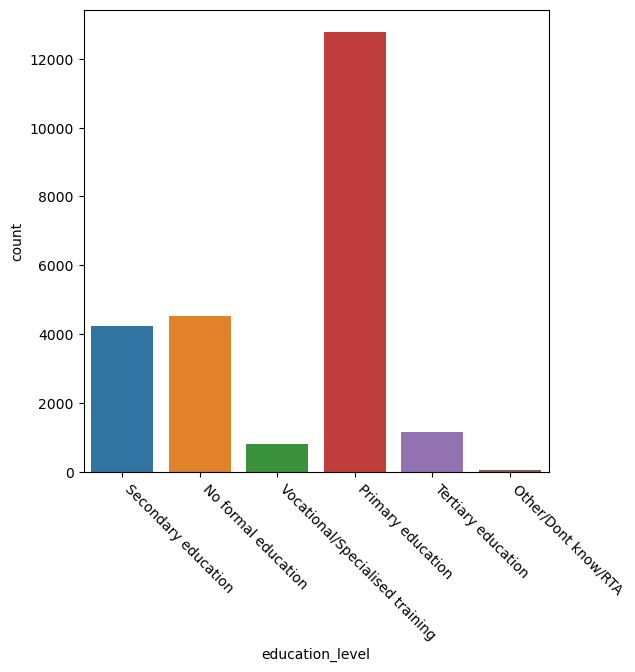

In [53]:
plt.figure(figsize=(6,6))
plt.xticks(rotation = -45, ha="left")
sns.countplot(x="education_level", data=data)
plt.show()

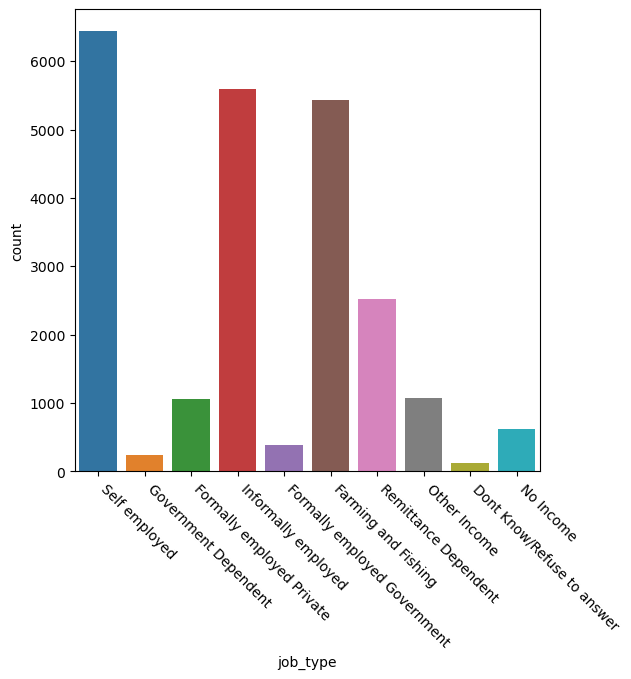

In [54]:
plt.figure(figsize=(6,6))
plt.xticks(rotation = -45, ha="left")
sns.countplot(x="job_type", data=data)
plt.show()

In [11]:
le = LabelEncoder()
train_data["bank_account"] = le.fit_transform(train_data["bank_account"])
preprocessed_Y = train_data["bank_account"]
X = train_data.drop(columns="bank_account", axis=1)
X

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [120]:
one_hot_encoder = OneHotEncoder(sparse=False)
def preprocessed(data):
    categories = {"country","relationship_with_head", "marital_status", "education_level","job_type"}
    data["country"] = one_hot_encoder.fit_transform(data[["country"]])
    data["relationship_with_head"] = one_hot_encoder.fit_transform(data[["relationship_with_head"]])
    data["marital_status"] = one_hot_encoder.fit_transform(data[["marital_status"]])
    data["education_level"] = one_hot_encoder.fit_transform(data[["education_level"]])
    data["job_type"] = one_hot_encoder.fit_transform(data[["job_type"]])
    
    data["location_type"] = le.fit_transform(data[["location_type"]])
    data["cellphone_access"] = le.fit_transform(data[["cellphone_access"]])
    data["gender_of_respondent"] = le.fit_transform(data[["gender_of_respondent"]])
    
    data = data.drop("uniqueid", axis=1)
    
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return data

In [121]:
preprocessed_X = preprocessed(X)
preprocessed_X

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,-1.696093,1.208541,-0.800064,0.589721,-0.358007,-0.896188,-0.833774,0.323531,0.311115,0.487359,0.073383
1,-1.696093,1.208541,-0.800064,-1.695716,0.539834,1.888279,-0.833774,0.323531,0.311115,-2.051874,0.073383
2,-1.696093,1.208541,1.249899,0.589721,0.539834,-0.775124,1.199366,0.323531,0.311115,0.487359,0.073383
3,-1.696093,1.208541,-0.800064,0.589721,0.539834,-0.290869,-0.833774,0.323531,0.311115,0.487359,0.073383
4,-1.696093,1.208541,1.249899,-1.695716,1.886596,-0.775124,1.199366,-3.090892,0.311115,0.487359,0.073383
...,...,...,...,...,...,...,...,...,...,...,...
23519,0.589590,1.208541,-0.800064,0.589721,0.090914,0.556577,-0.833774,0.323531,-3.214251,-2.051874,0.073383
23520,0.589590,1.208541,-0.800064,0.589721,-0.806927,-0.714592,-0.833774,0.323531,0.311115,0.487359,0.073383
23521,0.589590,1.208541,-0.800064,0.589721,0.539834,-0.714592,-0.833774,0.323531,0.311115,0.487359,0.073383
23522,0.589590,1.208541,1.249899,0.589721,1.437676,-0.532997,-0.833774,0.323531,-3.214251,0.487359,0.073383


In [122]:
def feature_select(X, Y, num_feats):
    # using pearson correlation
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], Y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    
    #using chi square
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, Y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()

    #using recursive feature elimination
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_selector.fit(X_norm, Y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    
    #using Lasso:SelectModel
    embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1", solver='liblinear'), max_features=num_feats)
    embeded_lr_selector.fit(X_norm, Y)

    embeded_lr_support = embeded_lr_selector.get_support()
    embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
    
    #using Random Forest Tree
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
    embeded_rf_selector.fit(X, Y)

    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    
    new_data = pd.DataFrame({'Feature':preprocessed_X.columns.tolist(),
                         'Pearson':cor_support,
                         'Chi Squared':chi_support,
                         'RFE':rfe_support,
                         'Lasso':embeded_lr_support,
                         'Random Forest Tree':embeded_rf_support})
    
    new_data['Total'] = np.sum(new_data, axis=1)
    new_data = new_data.sort_values(by='Total', ascending=False).reset_index(drop=True)
    return new_data

new = feature_select(preprocessed_X, preprocessed_Y, 6)
new

Fitting estimator with 11 features.


C:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


,Feature,Pearson,Chi Squared,RFE,Lasso,Random Forest Tree,Total
0,country,True,True,True,True,False,4
1,cellphone_access,True,True,True,True,False,4
2,education_level,True,True,True,True,False,4
3,household_size,False,False,True,True,True,3
4,age_of_respondent,False,False,True,True,True,3
5,year,True,True,False,False,False,2
6,location_type,True,True,False,False,False,2
7,gender_of_respondent,True,True,False,False,False,2
8,relationship_with_head,False,False,True,True,False,2
9,marital_status,False,False,False,False,False,0


In [123]:
best_features = new[new.Total >= 2]['Feature'].tolist()
best_features

['country',
 'cellphone_access',
 'education_level',
 'household_size',
 'age_of_respondent',
 'year',
 'location_type',
 'gender_of_respondent',
 'relationship_with_head']

In [124]:
final_X = preprocessed_X[best_features]

In [125]:
X_train, X_val, Y_train, Y_val = train_test_split(final_X, preprocessed_Y, stratify = preprocessed_Y, 
                                                  test_size = 0.1, random_state=2)

In [126]:
print(final_X.shape, X_train.shape, X_val.shape)

(23524, 9) (21171, 9) (2353, 9)


In [127]:
xgb = XGBClassifier() #Creating the algorithm
kNN = KNeighborsClassifier(n_neighbors=3)

In [128]:
xgb.fit(X_train, Y_train) #building the model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
kNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
# prediction on training data
xgb_pred = xgb.predict(X_val)
kNN_pred = kNN.predict(X_val)

In [131]:
r2_val_xgb = r2_score(Y_val, xgb_pred)
r2_val_kNN = r2_score(Y_val, kNN_pred)
mean_acc_xgb = mean_absolute_error(Y_val, xgb_pred)
mean_acc_kNN = mean_absolute_error(Y_val, kNN_pred)
acc_val_xgb = accuracy_score(Y_val, xgb_pred)
acc_val_kNN = accuracy_score(Y_val, kNN_pred)
prec_val_xgb = precision_score(Y_val, xgb_pred)
prec_val_kNN = precision_score(Y_val, kNN_pred)

In [132]:
print(f'For xgb Classifier:\nR Squared value = {r2_val_xgb}\nAccuracy = {acc_val_xgb}\nPrecision = {prec_val_xgb}\nMean Absolute Error = {mean_acc_xgb}')
print(f'For kNN Classifier:\nR Squared value = {r2_val_kNN}\nAccuracy = {acc_val_kNN}\nPrecision = {prec_val_kNN}\nMean Absolute Error = {mean_acc_kNN}')

For xgb Classifier:
R Squared value = -0.13557364459226462
Accuracy = 0.8627284317892052
Precision = 0.5377358490566038
Mean Absolute Error = 0.13727156821079473
For kNN Classifier:
R Squared value = -0.339484701515953
Accuracy = 0.8380790480237994
Precision = 0.3922413793103448
Mean Absolute Error = 0.1619209519762006


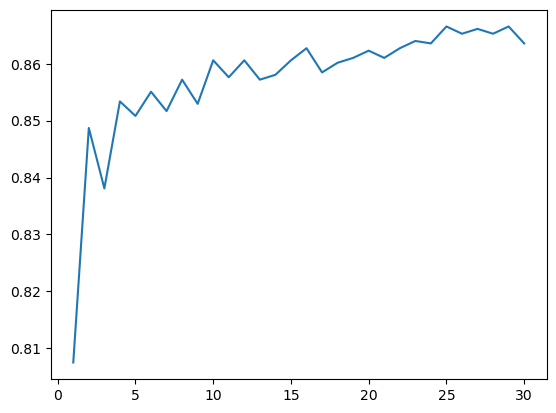

In [133]:
k_values = range(1,31)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_val)
    score = accuracy_score(Y_val, y_pred)
    scores.append(score)
plt.plot(k_values, scores)
index_max = scores.index(max(scores))
best_k = k_values[index_max]


In [134]:
xgb = XGBClassifier() #Creating the algorithm
kNN = KNeighborsClassifier(n_neighbors=14)
xgb.fit(X_train, Y_train) #building the model
kNN.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_val)
kNN_pred = kNN.predict(X_val)
r2_val_xgb = r2_score(Y_val, xgb_pred)
r2_val_kNN = r2_score(Y_val, kNN_pred)
acc_val_xgb = accuracy_score(Y_val, xgb_pred)
acc_val_kNN = accuracy_score(Y_val, kNN_pred)
prec_val_xgb = precision_score(Y_val, xgb_pred)
prec_val_kNN = precision_score(Y_val, kNN_pred)
print(f'For xgb Classifier:\nR Squared value = {r2_val_xgb}\nAccuracy = {acc_val_xgb}\nPrecision = {prec_val_xgb}')
print(f'For kNN Classifier:\nR Squared value = {r2_val_kNN}\nAccuracy = {acc_val_kNN}\nPrecision = {prec_val_kNN}')

For xgb Classifier:
R Squared value = -0.13557364459226462
Accuracy = 0.8627284317892052
Precision = 0.5377358490566038
For kNN Classifier:
R Squared value = -0.17424643125020545
Accuracy = 0.8580535486612835
Precision = 0.4838709677419355


In [150]:
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [151]:
preprocessed_test_X = preprocessed(test_X)
final_X = preprocessed_test_X[best_features]
final_X

C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. 

,country,cellphone_access,education_level,household_size,age_of_respondent,year,location_type,gender_of_respondent,relationship_with_head
0,1.696390,0.578190,-0.471747,-0.351983,-0.510678,1.208635,1.260216,1.174451,-0.324709
1,1.696390,0.578190,-0.471747,1.455835,0.780101,1.208635,1.260216,1.174451,-0.324709
2,1.696390,-1.729536,2.119779,-0.351983,2.378208,1.208635,-0.793515,-0.851462,-0.324709
3,1.696390,-1.729536,-0.471747,1.003881,0.042513,1.208635,-0.793515,-0.851462,-0.324709
4,1.696390,-1.729536,-0.471747,-0.351983,-1.371197,1.208635,1.260216,1.174451,3.079677
...,...,...,...,...,...,...,...,...,...
10081,-0.589487,-1.729536,-0.471747,-0.803938,1.456223,1.208635,-0.793515,-0.851462,-0.324709
10082,-0.589487,0.578190,-0.471747,1.907790,0.226910,1.208635,1.260216,1.174451,-0.324709
10083,-0.589487,0.578190,-0.471747,-1.255893,0.042513,1.208635,1.260216,1.174451,-0.324709
10084,-0.589487,0.578190,-0.471747,1.003881,-0.633609,1.208635,-0.793515,-0.851462,-0.324709


In [152]:
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [154]:
test_data['bank_account'] = xgb.predict(final_X)
test_data

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,0
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,0
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed,0
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed,0
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income,1
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed,0


In [155]:
submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],
                           "bank_account": test_data.bank_account})
submission

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0
1,uniqueid_6060 x Kenya,0
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0
...,...,...
10081,uniqueid_2998 x Uganda,0
10082,uniqueid_2999 x Uganda,0
10083,uniqueid_3000 x Uganda,1
10084,uniqueid_3001 x Uganda,0


In [157]:
submission.to_csv('firstSubmission.csv', index=False)
